In [1]:
import csv

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score, log_loss
from sklearn.preprocessing import label_binarize

tf.device('/gpu:0')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
RANDOM_SEED = 42

Num GPUs Available:  0


# Specify each path

In [1007]:
dataset = '../model/keypoint_classifier/keypoint.csv'
model_save_path = '../model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = '../model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [1008]:
NUM_CLASSES = 6

# Dataset reading

In [1009]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [1010]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1080\3345009797.py:1: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))


In [1011]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Xử lý dữ liệu

## THỐNG KÊ VÀ TÌM HIỂU DỮ LIỆU

---

In [1012]:
X_dataset_check = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(0, (21 * 2) + 1)))
X_dataset_check = pd.DataFrame(X_dataset_check)
# print(X_dataset_check)

In [1013]:
# Lọc các hàng có giá trị khác 1 và 3 ở cột 1
# X_dataset_check = X_dataset_check.loc[(X_dataset_check[0] != 1) & (X_dataset_check[0] != 2)].sort_values(0)
# filtered_df.to_csv('filtered_data.csv', index=False)
X_dataset_check[0].value_counts()
# X_dataset_check.to_csv(r'D:\Hoc_Tap\Tu_Hoc\B_NCKH\NCKH\NCKH_Hand_gesture_recognition_Mediapipe\model\keypoint_classifier\keypoint.csv', index=False)

0
3.0    6014
0.0    5611
5.0    5562
4.0    4851
2.0    4457
1.0    4422
Name: count, dtype: int64

In [1014]:
X_dataset_check.head(15)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.0,1.0,2.0,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,33.000000,34.000000,35.000000,36.000000,37.000000,38.000000,39.000000,40.000000,41.000000,42.000000
1,0.0,0.0,0.0,-0.142105,0.026316,-0.294737,-0.005263,-0.315789,-0.142105,-0.289474,...,-0.168421,-0.178947,-0.200000,-0.405263,-0.173684,-0.436842,-0.121053,-0.305263,-0.121053,-0.236842
2,0.0,0.0,0.0,-0.147399,-0.193642,-0.170520,-0.367052,-0.170520,-0.502890,-0.184971,...,-0.130058,-0.369942,0.060694,-0.390173,-0.187861,-0.424856,-0.225434,-0.349711,-0.184971,-0.309249
3,0.0,0.0,0.0,-0.142857,0.021978,-0.302198,-0.027473,-0.313187,-0.170330,-0.269231,...,-0.159341,-0.197802,-0.175824,-0.434066,-0.148352,-0.461538,-0.104396,-0.318681,-0.104396,-0.247253
4,0.0,0.0,0.0,-0.150838,0.016760,-0.307263,-0.039106,-0.318436,-0.184358,-0.273743,...,-0.167598,-0.206704,-0.167598,-0.441341,-0.145251,-0.469274,-0.106145,-0.318436,-0.106145,-0.245810
5,0.0,0.0,0.0,-0.149425,0.022989,-0.316092,-0.022989,-0.321839,-0.172414,-0.270115,...,-0.172414,-0.201149,-0.166667,-0.471264,-0.109195,-0.454023,-0.080460,-0.304598,-0.103448,-0.241379
6,0.0,0.0,0.0,-0.161677,0.005988,-0.329341,-0.053892,-0.323353,-0.209581,-0.257485,...,-0.161677,-0.221557,-0.143713,-0.502994,-0.089820,-0.473054,-0.065868,-0.311377,-0.089820,-0.239521
7,0.0,0.0,0.0,-0.164634,0.006098,-0.335366,-0.067073,-0.329268,-0.219512,-0.262195,...,-0.170732,-0.237805,-0.140244,-0.518293,-0.079268,-0.487805,-0.067073,-0.323171,-0.091463,-0.262195
8,0.0,0.0,0.0,-0.136364,0.040404,-0.282828,0.020202,-0.323232,-0.116162,-0.318182,...,-0.186869,-0.161616,-0.232323,-0.358586,-0.207071,-0.393939,-0.151515,-0.272727,-0.151515,-0.207071
9,0.0,0.0,0.0,-0.149333,-0.080000,-0.280000,-0.248000,-0.285333,-0.408000,-0.154667,...,-0.080000,-0.250667,0.160000,-0.429333,0.072000,-0.389333,0.016000,-0.285333,0.008000,-0.245333


In [1015]:
# In thông tin các cột trong DF => không tồn tại kiểu dự liệu phi số, không sữ liệu rỗng, dữ liệu đã được tiền xử lý
X_dataset_check.info()
print('Shape tập dữ liệu: ', X_dataset_check.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30917 entries, 0 to 30916
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       30917 non-null  float32
 1   1       30917 non-null  float32
 2   2       30917 non-null  float32
 3   3       30917 non-null  float32
 4   4       30917 non-null  float32
 5   5       30917 non-null  float32
 6   6       30917 non-null  float32
 7   7       30917 non-null  float32
 8   8       30917 non-null  float32
 9   9       30917 non-null  float32
 10  10      30917 non-null  float32
 11  11      30917 non-null  float32
 12  12      30917 non-null  float32
 13  13      30917 non-null  float32
 14  14      30917 non-null  float32
 15  15      30917 non-null  float32
 16  16      30917 non-null  float32
 17  17      30917 non-null  float32
 18  18      30917 non-null  float32
 19  19      30917 non-null  float32
 20  20      30917 non-null  float32
 21  21      30917 non-null  float32
 22

## Check số lượng các nhãn
---

          Nhãn  Quy đổi
0      Nothing      0.0
1      Nothing      0.0
2      Nothing      0.0
3      Nothing      0.0
4      Nothing      0.0
...        ...      ...
30912    Right      2.0
30913    Right      2.0
30914    Right      2.0
30915    Right      2.0
30916    Right      2.0

[30917 rows x 2 columns]


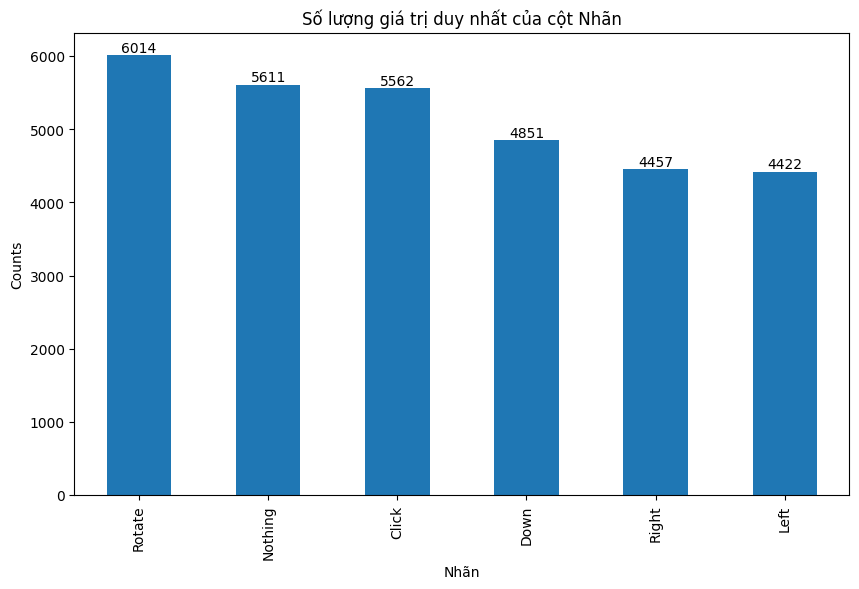

-----------------------------------------------
Số các giá trị duy nhất của cột Nhãn:
Nhãn
Rotate     6014
Nothing    5611
Click      5562
Down       4851
Right      4457
Left       4422
Name: count, dtype: int64


In [1016]:
import matplotlib.pyplot as plt
import seaborn as sns

def categories_counts(label_name, dataset):
    print(f'-----------------------------------------------')
    print(f'Số các giá trị duy nhất của cột {label_name}:')
    print(dataset[label_name].value_counts())
    
def plt_categories_counts(label_name, dataset):
    counts = dataset[label_name].value_counts()
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar')
     # Hiển thị số liệu trên các cột
    for i, count in enumerate(counts):
        plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')
    plt.title(f'Số lượng giá trị duy nhất của cột {label_name}')
    plt.xlabel(label_name)
    plt.ylabel('Counts')
    plt.show()
    categories_counts(label_name, dataset)

label = X_dataset_check[0]
label = pd.DataFrame(label)

a = len(label)
new_column = [None] * len(label)
new_column = pd.DataFrame(new_column)
label = pd.concat([new_column,label],axis=1)
label.columns = ['Nhãn', 'Quy đổi']

label.loc[label['Quy đổi'] == 0, 'Nhãn'] = 'Nothing'
label.loc[label['Quy đổi'] == 1, 'Nhãn'] = 'Left'
label.loc[label['Quy đổi'] == 2, 'Nhãn'] = 'Right'
label.loc[label['Quy đổi'] == 3, 'Nhãn'] = 'Rotate'
label.loc[label['Quy đổi'] == 4, 'Nhãn'] = 'Down'
label.loc[label['Quy đổi'] == 5, 'Nhãn'] = 'Click'

print(label)

# Đếm các giá trị duy nhất của các cột có Nhãn 
plt_categories_counts('Nhãn', label)


## Kiểm tra mức độ sạch của dữ liệu
---

In [1017]:
def statistical_missing_data(dataFrame):
    # Kiểm tra số lượng giá trị khuyết cho mỗi cột
    missing_data = dataFrame.isnull().sum()
    
    # Tính tổng số lượng giá trị khuyết
    duplicate_data = dataFrame.duplicated().sum()

    # Tính tỷ lệ giá trị khuyết trên tổng số giá trị
    percent_missing = (duplicate_data / (dataFrame.shape[0] * dataFrame.shape[1])) * 100

    print("Số liệu thiếu trong mỗi cột:, ")
    print(missing_data)
    print("\nSố liệu trùng lặp: ", duplicate_data)
    print("Tỷ lệ giá trị khuyết trên tổng số giá trị (%): {:.2f}".format(percent_missing))

# Thống kê dữ liệu khuyết
statistical_missing_data(X_dataset_check)

Số liệu thiếu trong mỗi cột:, 
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
dtype: int64

Số liệu trùng lặp:  4
Tỷ lệ giá trị khuyết trên tổng số giá trị (%): 0.00


In [1018]:
def plt_statistics_missing_data(dataFrame):
    # Dữ liệu khuyết
    missing_data = dataFrame.isnull().sum()
    missing_data = missing_data[missing_data > 0]
    plt.figure(figsize=(10, 5))
    missing_data.plot(kind='bar')
    plt.title('Dữ liệu khuyết trong mỗi cột')
    plt.xlabel('Tên cột')
    plt.ylabel('Số lượng dữ liệu khuyết')
    plt.show()

    # Dữ liệu lặp
    duplicate_data = dataFrame.duplicated().sum()
    print("\nSố liệu trùng lặp:", duplicate_data)

# Thống kê dữ liệu khuyết
# plt_statistics_missing_data(X_dataset_check)
missing_data = X_dataset_check.isnull().sum()
print(missing_data.to_frame().T)
# missing_data.to_frame().T.to_csv('../test.txt', sep='\t', index=False)


   0   1   2   3   4   5   6   7   8   9   ...  33  34  35  36  37  38  39  \
0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

   40  41  42  
0   0   0   0  

[1 rows x 43 columns]


In [1019]:
X_dataset_check.describe()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
count,30917.000000,30917.000000,30917.000000,30917.000000,30917.000000,30917.000000,30917.000000,30917.000000,30917.000000,30917.000000,...,30917.000000,30917.000000,30917.000000,30917.000000,30917.000000,30917.000000,30917.000000,30917.000000,30917.000000,30917.000000
mean,2.542032,0.000032,0.000065,-0.015860,-0.083881,-0.025663,-0.219045,-0.030430,-0.334509,-0.032598,...,-0.017372,-0.333614,0.009465,-0.356977,-0.000087,-0.411681,-0.003354,-0.381615,-0.002349,-0.386525
std,1.736864,0.005687,0.011374,0.211423,0.136257,0.383219,0.273220,0.467190,0.381538,0.490391,...,0.343475,0.453779,0.344138,0.376985,0.391713,0.465143,0.393862,0.470368,0.405648,0.497128
min,0.000000,0.000000,0.000000,-0.544304,-0.580247,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-0.966942,-1.000000,-1.000000,-1.000000,-0.934426,-1.000000,-1.000000,-1.000000
25%,1.000000,0.000000,0.000000,-0.172794,-0.161826,-0.290698,-0.367925,-0.342105,-0.538462,-0.333333,...,-0.162996,-0.535211,-0.199134,-0.523077,-0.215054,-0.686047,-0.198582,-0.703226,-0.185841,-0.723684
50%,3.000000,0.000000,0.000000,-0.058020,-0.107438,-0.081448,-0.292776,-0.044000,-0.443223,-0.017921,...,-0.020576,-0.338983,0.000000,-0.413919,-0.010638,-0.502924,-0.013793,-0.446429,-0.014184,-0.402299
75%,4.000000,0.000000,0.000000,0.157895,-0.016667,0.261993,-0.154070,0.293893,-0.261981,0.276224,...,0.109589,-0.201923,0.205357,-0.293939,0.207865,-0.306569,0.175227,-0.243243,0.158879,-0.211268
max,5.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,33.000000,34.000000,35.000000,36.000000,37.000000,38.000000,39.000000,40.000000,41.000000,42.000000


In [1020]:
X_dataset_check

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.0,1.0,2.0,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,33.000000,34.000000,35.000000,36.000000,37.000000,38.000000,39.000000,40.000000,41.000000,42.000000
1,0.0,0.0,0.0,-0.142105,0.026316,-0.294737,-0.005263,-0.315789,-0.142105,-0.289474,...,-0.168421,-0.178947,-0.200000,-0.405263,-0.173684,-0.436842,-0.121053,-0.305263,-0.121053,-0.236842
2,0.0,0.0,0.0,-0.147399,-0.193642,-0.170520,-0.367052,-0.170520,-0.502890,-0.184971,...,-0.130058,-0.369942,0.060694,-0.390173,-0.187861,-0.424856,-0.225434,-0.349711,-0.184971,-0.309249
3,0.0,0.0,0.0,-0.142857,0.021978,-0.302198,-0.027473,-0.313187,-0.170330,-0.269231,...,-0.159341,-0.197802,-0.175824,-0.434066,-0.148352,-0.461538,-0.104396,-0.318681,-0.104396,-0.247253
4,0.0,0.0,0.0,-0.150838,0.016760,-0.307263,-0.039106,-0.318436,-0.184358,-0.273743,...,-0.167598,-0.206704,-0.167598,-0.441341,-0.145251,-0.469274,-0.106145,-0.318436,-0.106145,-0.245810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30912,2.0,0.0,0.0,0.146893,0.033898,0.271186,-0.050847,0.192090,-0.214689,0.135593,...,0.141243,-0.242938,0.112994,-0.401130,0.090395,-0.418079,0.062147,-0.288136,0.050847,-0.197740
30913,2.0,0.0,0.0,0.153409,0.034091,0.272727,-0.045455,0.193182,-0.210227,0.136364,...,0.136364,-0.232955,0.113636,-0.409091,0.079545,-0.414773,0.051136,-0.289773,0.056818,-0.204545
30914,2.0,0.0,0.0,0.141243,0.033898,0.265537,-0.033898,0.180791,-0.192090,0.118644,...,0.129944,-0.214689,0.107345,-0.406780,0.062147,-0.384181,0.039548,-0.254237,0.045198,-0.175141
30915,2.0,0.0,0.0,0.146893,0.033898,0.271186,-0.039548,0.180791,-0.197740,0.112994,...,0.135593,-0.214689,0.101695,-0.406780,0.062147,-0.384181,0.039548,-0.254237,0.045198,-0.175141


In [1021]:
# find the correlation among the columns in the Dataframe
X_dataset_check.corr()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,1.000000,-0.008324,-0.008324,0.035461,-0.013800,0.040398,-0.044150,0.037362,-0.054143,0.034403,...,0.012343,-0.095185,0.002401,-0.111146,0.010534,-0.154952,0.016103,-0.242999,0.019981,-0.300363
1,-0.008324,1.000000,1.000000,0.081129,0.170462,0.074587,0.129457,0.085586,0.124239,0.104759,...,0.546716,0.430317,0.578272,0.548502,0.537217,0.469669,0.563211,0.488270,0.574875,0.484930
2,-0.008324,1.000000,1.000000,0.081129,0.170462,0.074587,0.129457,0.085586,0.124239,0.104759,...,0.546716,0.430317,0.578272,0.548502,0.537217,0.469669,0.563211,0.488270,0.574875,0.484930
3,0.035461,0.081129,0.081129,1.000000,0.066451,0.980621,0.073791,0.932073,0.067341,0.842462,...,0.272392,0.059069,-0.217903,0.100468,-0.059104,0.070903,-0.046653,0.065577,-0.078289,0.062187
4,-0.013800,0.170462,0.170462,0.066451,1.000000,0.059831,0.942572,0.055865,0.856524,0.056762,...,0.094649,0.489832,0.076540,0.282234,0.070148,0.382361,0.080942,0.408907,0.081425,0.386453
5,0.040398,0.074587,0.074587,0.980621,0.059831,1.000000,0.064263,0.978475,0.056724,0.905910,...,0.354177,0.049480,-0.110793,0.093058,0.044028,0.061168,0.044092,0.055584,0.007489,0.053627
6,-0.044150,0.129457,0.129457,0.073791,0.942572,0.064263,1.000000,0.060847,0.973818,0.064570,...,0.067972,0.604346,0.044294,0.468528,0.037464,0.568012,0.047123,0.560149,0.047346,0.521130
7,0.037362,0.085586,0.085586,0.932073,0.055865,0.978475,0.060847,1.000000,0.055000,0.970275,...,0.415948,0.051833,-0.007164,0.101973,0.148623,0.065767,0.140280,0.057438,0.099190,0.055958
8,-0.054143,0.124239,0.124239,0.067341,0.856524,0.056724,0.973818,0.055000,1.000000,0.062217,...,0.062402,0.651450,0.044935,0.565044,0.037779,0.664742,0.046771,0.639946,0.046419,0.592802
9,0.034403,0.104759,0.104759,0.842462,0.056762,0.905910,0.064570,0.970275,0.062217,1.000000,...,0.451719,0.067805,0.091703,0.121026,0.240181,0.084564,0.228256,0.072982,0.187182,0.070472


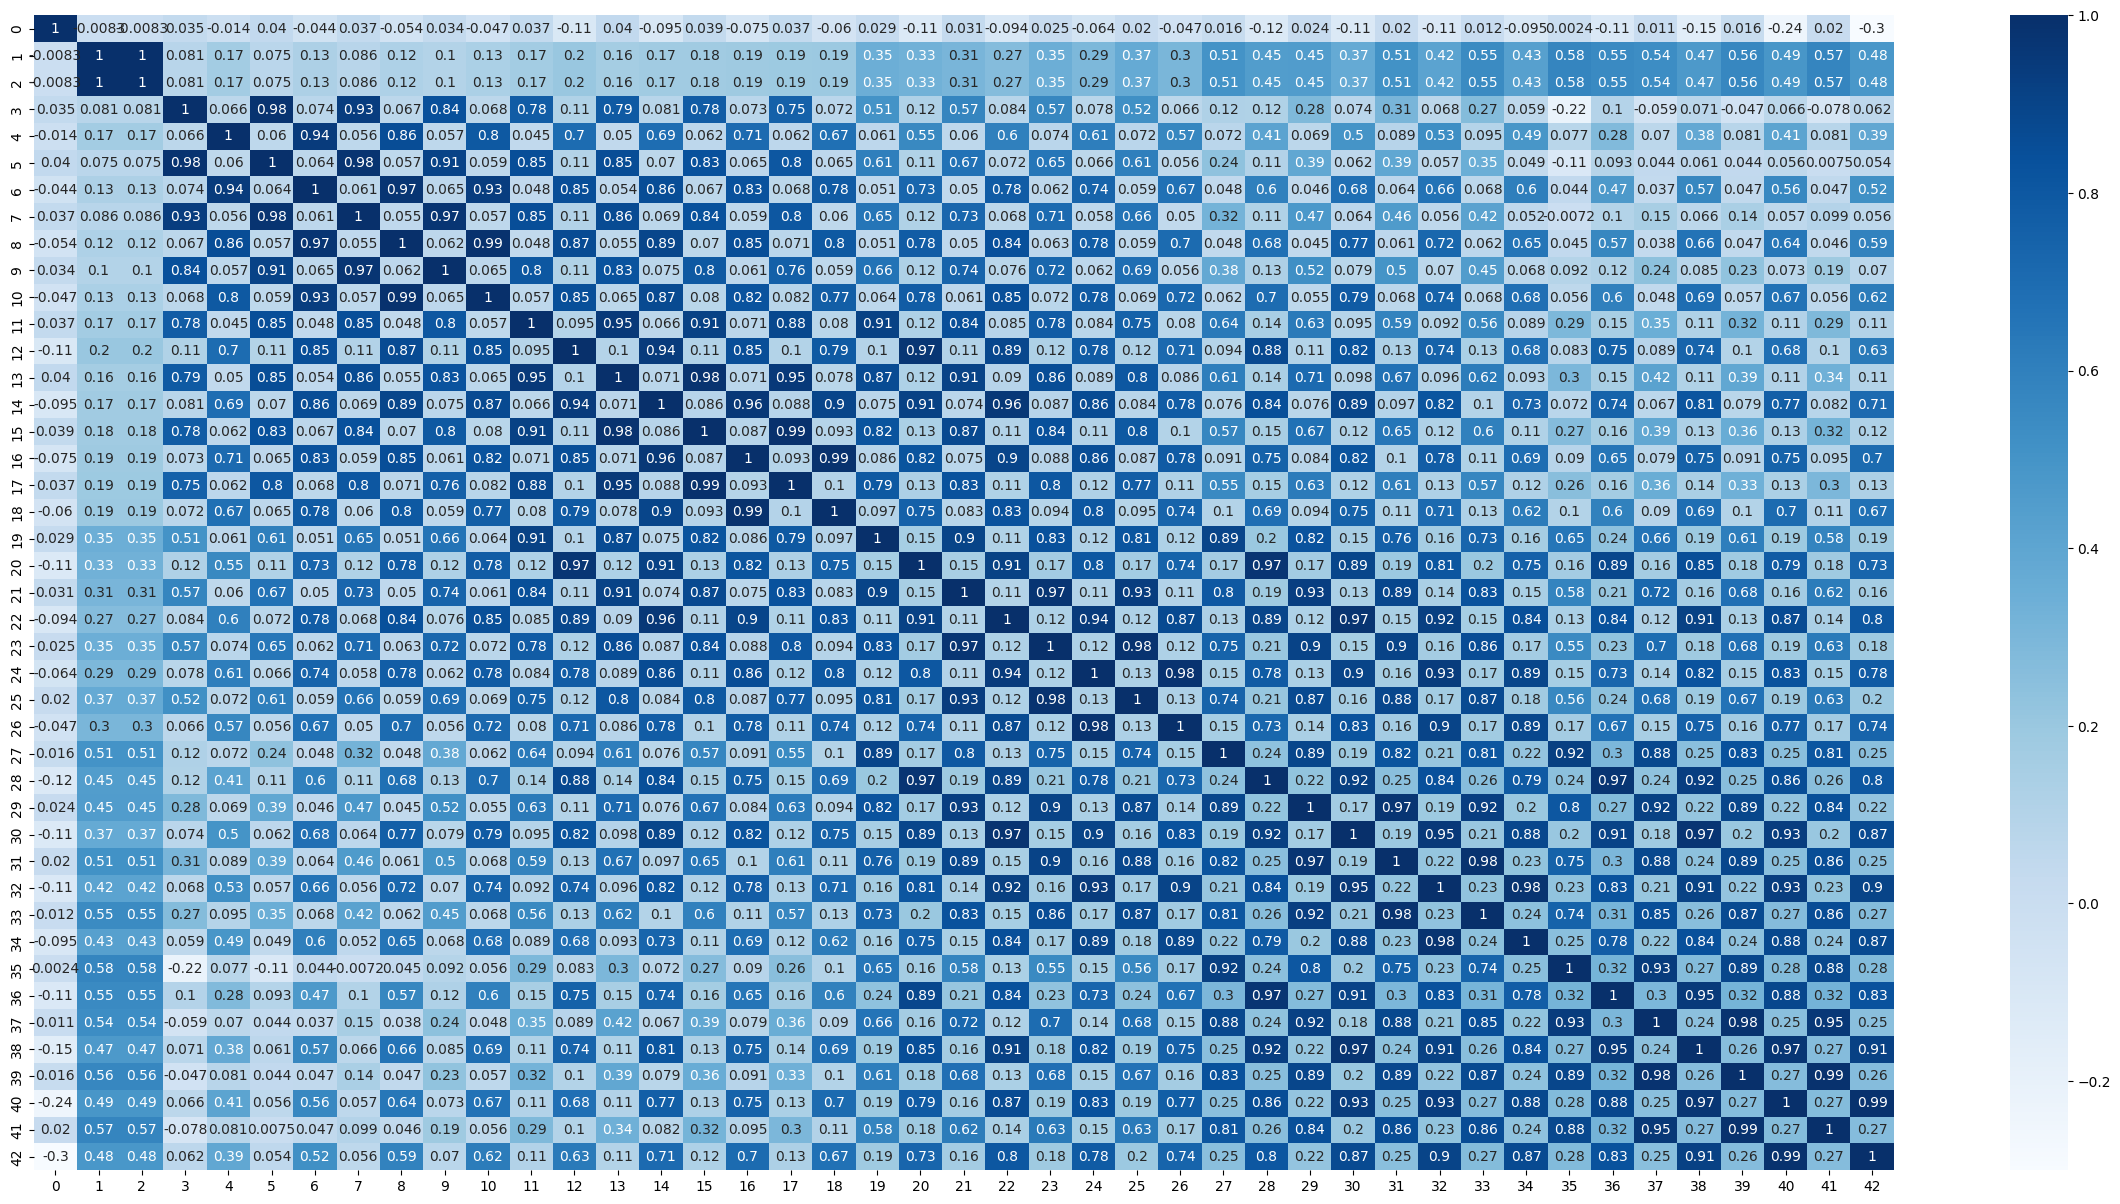

In [1022]:
plt.figure(figsize = (30,15))
sns.heatmap(X_dataset_check.corr(numeric_only = True), annot = True, cmap = plt.cm.Blues)
plt.show()

# Model building

In [1023]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),   
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [1024]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_58 (Dropout)        (None, 42)                0         
                                                                 
 dense_87 (Dense)            (None, 20)                860       
                                                                 
 dropout_59 (Dropout)        (None, 20)                0         
                                                                 
 dense_88 (Dense)            (None, 10)                210       
                                                                 
 dense_89 (Dense)            (None, 6)                 66        
                                                                 
Total params: 1,136
Trainable params: 1,136
Non-trainable params: 0
_________________________________________________________________


In [1025]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False) # automatically save your model
# verbose : gọi lại thông báo mỗi khi thông báo
# save_weights_only: lưu lại cả mô hình lẫn thông số mô hình nếu False

# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=25, verbose=1)
# dừng quá trình đào tạo nếu hiệu suất mô hình ko đc cải thiện

In [1026]:
# Model compilation
model.compile(
    optimizer='adam', # hàm tối ưu
    loss='sparse_categorical_crossentropy', # hàm mất mát
    metrics=['accuracy'] # thuước  đo đánh giá
)

# Model training

In [1027]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
168/182 [==========================>...] - ETA: 0s - loss: 1.7516 - accuracy: 0.2441
Epoch 1: saving model to ../model/keypoint_classifier\keypoint_classifier.hdf5
182/182 [==============================] - 1s 4ms/step - loss: 1.7457 - accuracy: 0.2480 - val_loss: 1.5949 - val_accuracy: 0.4944
Epoch 2/1000
167/182 [==========================>...] - ETA: 0s - loss: 1.5752 - accuracy: 0.3550
Epoch 2: saving model to ../model/keypoint_classifier\keypoint_classifier.hdf5
182/182 [==============================] - 1s 3ms/step - loss: 1.5695 - accuracy: 0.3570 - val_loss: 1.2809 - val_accuracy: 0.7278
Epoch 3/1000
172/182 [===========================>..] - ETA: 0s - loss: 1.4219 - accuracy: 0.4304
Epoch 3: saving model to ../model/keypoint_classifier\keypoint_classifier.hdf5
182/182 [==============================] - 1s 3ms/step - loss: 1.4195 - accuracy: 0.4318 - val_loss: 1.0734 - val_accuracy: 0.7867
Epoch 4/1000
174/182 [===========================>..] - ETA: 0s - loss: 1.32

In [1028]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

61/61 [==============================] - 0s 2ms/step - loss: 0.5871 - accuracy: 0.8767


In [1029]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [1030]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 85ms/step
[0.526904   0.01466053 0.31862065 0.01122104 0.02192371 0.10667008]
0


# Draw Loss and Accuracy

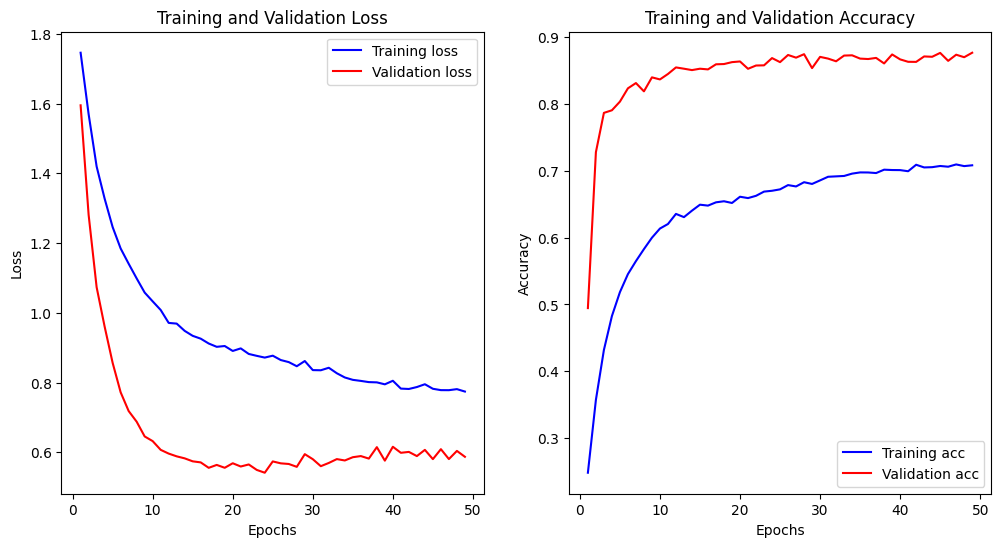

In [1031]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Lấy thông tin về loss và accuracy từ history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)

    # Vẽ biểu đồ Loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Vẽ biểu đồ Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_training_history(history)

242/242 [==============================] - 0s 1ms/step
Accuracy: 0.8767141009055628
Precision: 0.8843589660900047
Recall: 0.870999851821718
ROC AUC: 0.9801990982568564
F1-score for class 0 : 0.8438602116062841
F1-score for class 1 : 0.7950931394820536
F1-score for class 2 : 0.9013125911521633
F1-score for class 3 : 0.945763913505849
F1-score for class 4 : 0.815112540192926
F1-score for class 5 : 0.9452054794520548
Average F1-score: 0.8786243794730222
ROC AUC: {0: 0.9799508880098562, 1: 0.9723802686278235, 2: 0.9829465172333844, 3: 0.9966726604708558, 4: 0.9587252472681473, 5: 0.9905190079310711}


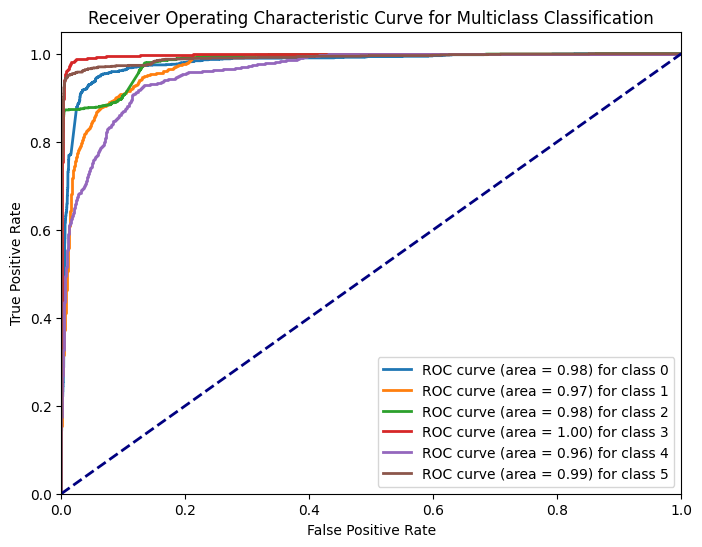

In [1032]:
# Định nghĩa hàm plot_roc_curve để vẽ đường cong ROC
def plot_roc_curve(fpr, tpr):
    # Vẽ đường cong ROC cho từng lớp
    plt.figure(figsize=(8, 6))
    for i in range(NUM_CLASSES):
        plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve for Multiclass Classification')
    plt.legend(loc="lower right")
    plt.show()

# Dự đoán xác suất cho từng lớp
y_pred_prob = model.predict(X_test)
# Chọn ra lớp có xác suất cao nhất
y_pred = np.argmax(y_pred_prob, axis=1)

# Tính toán các metric
accuracy = accuracy_score(y_test, y_pred)
loss = log_loss(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

# In kết quả
print("Accuracy:", accuracy)
print("Log_loss:", log_loss)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)

# Tính toán F1-score cho mỗi lớp
f1_scores = f1_score(y_test, y_pred, average=None)

# In ra F1-score của từng lớp
for i in range(NUM_CLASSES):
    print("F1-score for class", i, ":", f1_scores[i])

# Tính toán F1-score trung bình trên tất cả các lớp
average_f1_score = f1_score(y_test, y_pred, average='weighted')
print("Average F1-score:", average_f1_score)

def draw_roc_corve():
    
    # Chuyển đổi nhãn về dạng one-hot encoding
    y_test_one_hot = label_binarize(y_test, classes=np.arange(NUM_CLASSES))

    # Tính toán đường cong ROC cho mỗi lớp
    fpr = dict()
    tpr = dict()
    global roc_auc
    roc_auc = dict()
    for i in range(NUM_CLASSES):
        fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    print("ROC AUC:", roc_auc)
    # Vẽ đường cong ROC
    plot_roc_curve(fpr, tpr)
draw_roc_corve()

# Confusion matrix

242/242 [==============================] - 0s 1ms/step


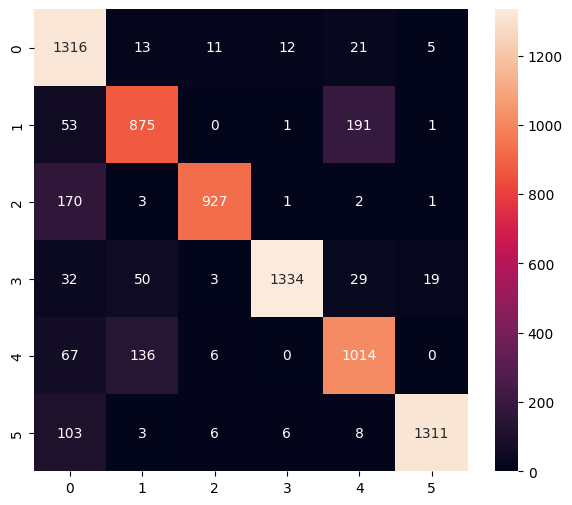

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.96      0.84      1378
           1       0.81      0.78      0.80      1121
           2       0.97      0.84      0.90      1104
           3       0.99      0.91      0.95      1467
           4       0.80      0.83      0.82      1223
           5       0.98      0.91      0.95      1437

    accuracy                           0.88      7730
   macro avg       0.88      0.87      0.87      7730
weighted avg       0.89      0.88      0.88      7730



In [1033]:
# phải sửa lại dữ liệu left và right, sửa thành tay kéo và like
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [1034]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [1035]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\ADMIN\AppData\Local\Temp\tmps674qw7z\assets


INFO:tensorflow:Assets written to: C:\Users\ADMIN\AppData\Local\Temp\tmps674qw7z\assets


6712

# Inference test

In [1036]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [1037]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_30:0', 'index': 0, 'shape': array([ 1, 42]), 'shape_signature': array([-1, 42]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [1038]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [1039]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [1040]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.526904   0.01466052 0.31862062 0.01122103 0.0219237  0.10667007]
0
